In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

from src.data_exploration.data_exploration import *

In [24]:
df = read_sqlite_table('housedata', './data/raw/rome_house_raw.db')

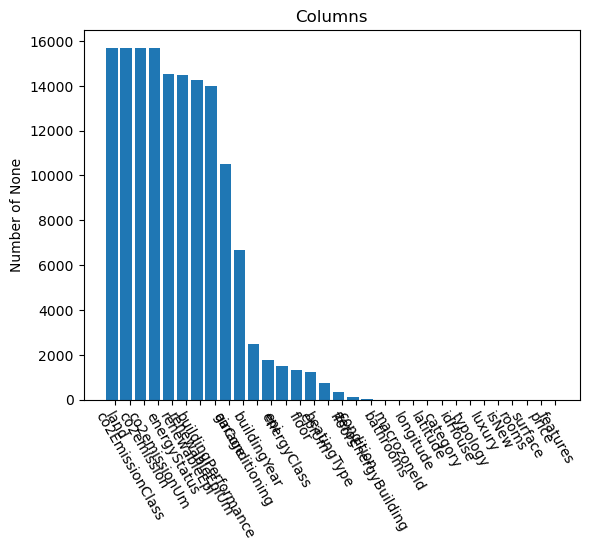

In [25]:
plot_bar(df, 'None')

In [26]:
df['garage'] = df['garage'].str.slice(stop=2)
df['garage'] = df['garage'].replace('No', '0')
df['garage'] = df['garage'].astype(int)

In [27]:
df.columns

Index(['macrozoneId', 'idHouse', 'latitude', 'longitude', 'price',
       'buildingYear', 'surface', 'rooms', 'bathrooms', 'floor', 'floors',
       'garage', 'land', 'isNew', 'luxury', 'typology', 'category',
       'condition', 'heatingType', 'airConditioning', 'energyClass',
       'zeroEnergyBuilding', 'epi', 'epiUm', 'renewableEpi', 'renewableEpiUm',
       'co2emission', 'co2emissionUm', 'co2EmissionClass', 'energyStatus',
       'buildingPerformance', 'features'],
      dtype='object')

In [28]:
cols_to_drop = ['idHouse','floors', 'heatingType', 'airConditioning', 'energyClass',
                'zeroEnergyBuilding', 'epi', 'epiUm', 'renewableEpi', 'renewableEpiUm',
                'co2emission', 'co2emissionUm', 'co2EmissionClass', 'energyStatus','buildingPerformance','land']
df = df.drop(cols_to_drop, axis = 1)

In [29]:
df.shape

(15703, 16)

In [30]:
uniques = []
for col in df.columns:
    uniques.append(df[col].nunique())
uniques = pd.DataFrame(uniques,df.columns)
uniques = uniques.sort_values(0, ascending=False)

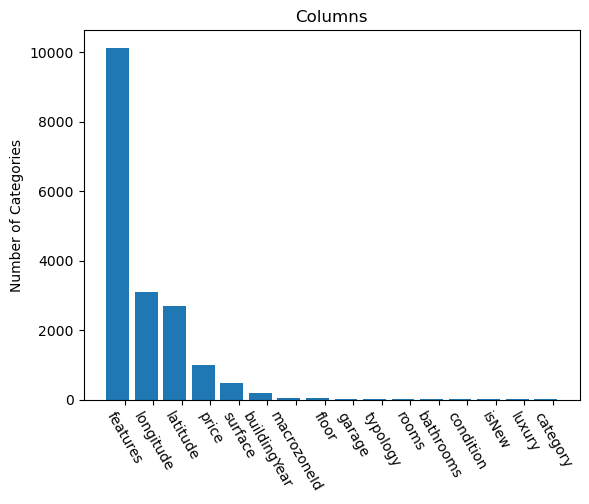

In [31]:
fig, ax = plt.subplots()

columns = list(uniques.index)
counts = uniques[0]

ax.bar(columns, counts, label=columns)

ax.set_ylabel('Number of Categories')
ax.set_title('Columns')
x = np.arange(len(columns))
width = 0.25
ax.set_xticks(x + width, columns, rotation=-60)

plt.show()

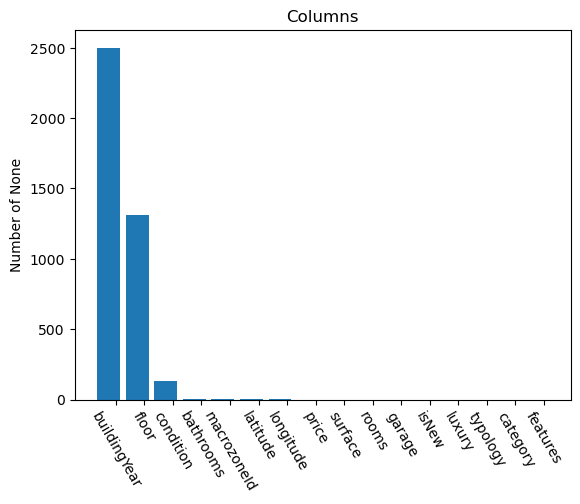

In [32]:
plot_bar(df, 'None')

In [33]:
df['condition'].unique()

array(['Ottimo / Ristrutturato', 'Buono / Abitabile',
       'Nuovo / In costruzione', 'Da ristrutturare', 'None'], dtype=object)

In [37]:
df['category'].value_counts()

Residenziale    15552
Name: category, dtype: int64

In [35]:
df = df[df['category'] != 'Palazzi - Edifici']

In [38]:
df['typology'].unique()

array(['Appartamento', 'Attico - Mansarda', 'Loft', 'Villa',
       'Villetta a schiera', 'Rustico - Casale', 'Casa indipendente'],
      dtype=object)

In [39]:
df['floor'].value_counts()

1          3118
2          2508
3          2069
T          1861
4          1525
None       1272
5           982
R           495
6           475
7           402
S           307
8           204
S - T        62
1 - 2        38
3 - 4        36
9            31
4 - 5        31
5 - 6        26
2 - 3        21
10           20
11            8
14            7
7 - 8         7
S2            6
8 - 9         6
A             5
6 - 7         5
13            3
12            2
16            2
T - R         2
3 - 5         2
20            2
17            1
M             1
1 - 4         1
1 - 3         1
26            1
S4            1
S3            1
9 - 10        1
S5            1
R - R         1
4 - 6         1
11 - 12       1
Name: floor, dtype: int64

In [40]:
df['floor'] = df['floor'].mask(df['floor'].map(df['floor'].value_counts()).lt(200), 'None')

In [41]:
df['floor'].value_counts()

1       3118
2       2508
3       2069
T       1861
None    1606
4       1525
5        982
R        495
6        475
7        402
S        307
8        204
Name: floor, dtype: int64

In [82]:
df1 = df.copy()

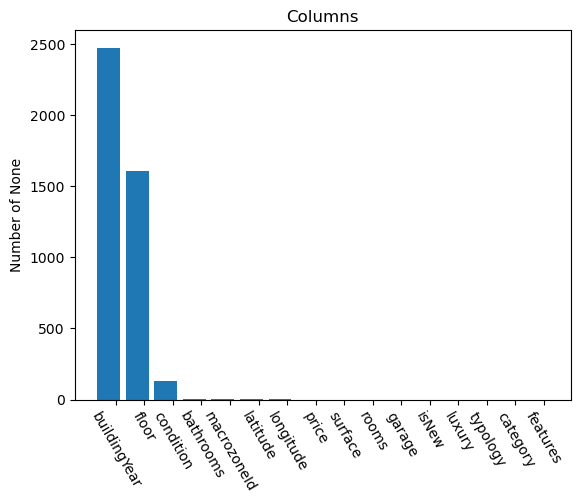

In [83]:
plot_bar(df1,missing_value='None')

In [84]:
diz = df1['buildingYear'].value_counts().to_dict()

In [85]:
for key in diz.keys():
    if key != 'None':
        key_1 = int(key[:3] + '0')
        interval = str(key_1) +'-' +str(key_1+9)
        diz[key] = interval
    else:
        diz[key] = key


In [86]:
df1['buildingYear'] = df1['buildingYear'].map(diz)

In [87]:
df1['buildingYear'].value_counts()

1960-1969    4166
None         2473
1970-1979    2070
1950-1959    1487
1980-1989    1004
2020-2029    1000
2010-2019     583
1930-1939     501
1990-1999     430
2000-2009     406
1900-1909     340
1940-1949     327
1920-1929     276
1800-1809     112
1890-1899      70
1600-1609      63
1700-1709      58
1500-1509      38
1910-1919      33
1880-1889      32
1110-1119      13
1860-1869      10
1870-1879       9
1400-1409       8
1850-1859       5
1750-1759       4
1650-1659       3
1190-1199       3
1300-1309       3
1690-1699       2
1730-1739       2
1550-1559       2
1480-1489       1
1840-1849       1
1660-1669       1
1790-1799       1
1490-1499       1
1560-1569       1
1200-1209       1
1460-1469       1
1050-1059       1
1780-1789       1
1570-1579       1
1770-1779       1
1760-1769       1
1680-1689       1
1810-1819       1
1000-1009       1
1070-1079       1
1060-1069       1
1830-1839       1
Name: buildingYear, dtype: int64

In [88]:
df2 = df1.copy()
df2.loc[df2.groupby('buildingYear')['buildingYear'].transform('count').lt(120), 'buildingYear'] = 'Pre 1920'

In [89]:
df2['buildingYear'].value_counts()

1960-1969    4166
None         2473
1970-1979    2070
1950-1959    1487
1980-1989    1004
2020-2029    1000
2010-2019     583
1930-1939     501
Pre 1920      489
1990-1999     430
2000-2009     406
1900-1909     340
1940-1949     327
1920-1929     276
Name: buildingYear, dtype: int64

In [90]:
save_to_sql('./data/processed/rome_house_preprocessing.db', df2, 'housedata')